In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set()

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load the dataset-1: Year 2009-2010.csv
df = pd.read_csv("Year 2009-2010.csv", encoding = "unicode_escape", parse_dates=['InvoiceDate'])
print("Total number of transactions happened in the given period: "+str(df.shape[0]))
df.head(5)

Total number of transactions happened in the given period: 525461


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [7]:
#load the dataset-2: Year 2010-2011.csv
df1 = pd.read_csv("Year 2010-2011.csv", encoding = "unicode_escape", parse_dates=['InvoiceDate'])
print("Total number of transactions happened in the given period: "+str(df1.shape[0]))
df1.head(5)

Total number of transactions happened in the given period: 541910


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
# Feature selection for dataset-1: Year 2009-2010.csv
features = ['Customer ID','InvoiceNo','InvoiceDate', 'Quantity', 'Price']
df_clv = df[features]
df_clv['TotalSales'] = df_clv['Quantity'].multiply(df_clv['Price'])
print(df_clv.shape)
df_clv.head()

(525461, 6)


,Customer ID,InvoiceNo,InvoiceDate,Quantity,Price,TotalSales
0,13085.0,489434,01-12-2009 07:45,12,6.95,83.4
1,13085.0,489434,01-12-2009 07:45,12,6.75,81.0
2,13085.0,489434,01-12-2009 07:45,12,6.75,81.0
3,13085.0,489434,01-12-2009 07:45,48,2.10,100.8
4,13085.0,489434,01-12-2009 07:45,24,1.25,30.0


In [9]:
# Feature selection for dataset-2: Year 2010-2011.csv
features = ['Customer ID','InvoiceNo','InvoiceDate', 'Quantity', 'Price']
df1_clv = df1[features]
df1_clv['TotalSales'] = df1_clv['Quantity'].multiply(df1_clv['Price'])
print(df1_clv.shape)
df1_clv.head()

(541910, 6)


,Customer ID,InvoiceNo,InvoiceDate,Quantity,Price,TotalSales
0,17850.0,536365,01-12-2010 08:26,6,2.55,15.30
1,17850.0,536365,01-12-2010 08:26,6,3.39,20.34
2,17850.0,536365,01-12-2010 08:26,8,2.75,22.00
3,17850.0,536365,01-12-2010 08:26,6,3.39,20.34
4,17850.0,536365,01-12-2010 08:26,6,3.39,20.34


In [10]:
#descriptive statistics of dataset-1: Year 2009-2010.csv
df_clv.describe()

,Customer ID,Quantity,Price,TotalSales
count,417534.000000,525461.000000,525461.000000,525461.000000
mean,15360.645478,10.337667,4.688834,18.154506
std,1680.811316,107.424110,146.126914,160.333083
min,12346.000000,-9600.000000,-53594.360000,-53594.360000
25%,13983.000000,1.000000,1.250000,3.750000
50%,15311.000000,3.000000,2.100000,9.950000
75%,16799.000000,10.000000,4.210000,17.700000
max,18287.000000,19152.000000,25111.090000,25111.090000


In [11]:
#descriptive statistics of dataset-2: Year 2010-2011.csv
df1_clv.describe()

,Customer ID,Quantity,Price,TotalSales
count,406830.000000,541910.000000,541910.000000,541910.000000
mean,15287.684160,9.552234,4.611138,17.987795
std,1713.603074,218.080957,96.759765,378.810474
min,12346.000000,-80995.000000,-11062.060000,-168469.600000
25%,13953.000000,1.000000,1.250000,3.400000
50%,15152.000000,3.000000,2.080000,9.750000
75%,16791.000000,10.000000,4.130000,17.400000
max,18287.000000,80995.000000,38970.000000,168469.600000


In [12]:
#dropping of negative values in the descriptive statistics
#for dataset-1
df_clv = df_clv[df_clv['TotalSales'] > 0]
df_clv.describe()

,Customer ID,Quantity,Price,TotalSales
count,407664.000000,511566.000000,511566.000000,511566.000000
mean,15368.592598,11.400150,4.252563,20.146502
std,1679.762138,86.761177,63.664629,90.920077
min,12346.000000,1.000000,0.001000,0.001000
25%,13997.000000,1.000000,1.250000,4.200000
50%,15321.000000,3.000000,2.100000,10.140000
75%,16812.000000,10.000000,4.210000,17.700000
max,18287.000000,19152.000000,25111.090000,25111.090000


In [13]:
#dropping of negative values in the descriptive statistics 
#for dataset-2
df1_clv = df1_clv[df1_clv['TotalSales'] > 0]
df1_clv.describe()

,Customer ID,Quantity,Price,TotalSales
count,397885.000000,530105.000000,530105.000000,530105.000000
mean,15294.416882,10.542019,3.907652,20.121867
std,1713.144421,155.523977,35.915652,270.356488
min,12346.000000,1.000000,0.001000,0.001000
25%,13969.000000,1.000000,1.250000,3.750000
50%,15159.000000,3.000000,2.080000,9.900000
75%,16795.000000,10.000000,4.130000,17.700000
max,18287.000000,80995.000000,13541.330000,168469.600000


In [14]:
#for dataset-1
pd.DataFrame(zip(df_clv.isnull().sum(), df_clv.isnull().sum()/len(df_clv)), columns=['Count', 'Proportion'], index=df_clv.columns)

,Count,Proportion
Customer ID,103902,0.203106
InvoiceNo,0,0.000000
InvoiceDate,0,0.000000
Quantity,0,0.000000
Price,0,0.000000
TotalSales,0,0.000000


In [15]:
#dataset-2
pd.DataFrame(zip(df1_clv.isnull().sum(), df1_clv.isnull().sum()/len(df1_clv)), columns=['Count', 'Proportion'], index=df1_clv.columns)

,Count,Proportion
Customer ID,132220,0.249422
InvoiceNo,0,0.000000
InvoiceDate,0,0.000000
Quantity,0,0.000000
Price,0,0.000000
TotalSales,0,0.000000


In [16]:
#removing the null values in the Customer ID variable from dataset-1
df_clv = df_clv[pd.notnull(df_clv['Customer ID'])]
pd.DataFrame(zip(df_clv.isnull().sum(), df_clv.isnull().sum()/len(df_clv)), columns=['Count', 'Proportion'], index=df_clv.columns)

,Count,Proportion
Customer ID,0,0.0
InvoiceNo,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
Price,0,0.0
TotalSales,0,0.0


In [17]:
#removing the null values in the Customer ID variable from dataset-2
df1_clv = df1_clv[pd.notnull(df1_clv['Customer ID'])]
pd.DataFrame(zip(df1_clv.isnull().sum(), df1_clv.isnull().sum()/len(df1_clv)), columns=['Count', 'Proportion'], index=df1_clv.columns)

,Count,Proportion
Customer ID,0,0.0
InvoiceNo,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
Price,0,0.0
TotalSales,0,0.0


In [18]:
# Convert 'InvoiceDate' column to datetime type
df_clv['InvoiceDate'] = pd.to_datetime(df_clv['InvoiceDate'], format='%d-%m-%Y %H:%M')


# Calculate the required statistics
maxdate = df_clv['InvoiceDate'].dt.date.max()
mindate = df_clv['InvoiceDate'].dt.date.min()
unique_cust = df_clv['Customer ID'].nunique()
tot_quantity = df_clv['Quantity'].sum()
tot_sales = df_clv['TotalSales'].sum()

# Print the details of the dataset
print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Sales for the period: {tot_sales}")


The Time range of transactions is: 2009-12-01 to 2010-12-09
Total number of unique customers: 4312
Total Quantity Sold: 5538354
Total Sales for the period: 8832003.274000002


In [19]:
# Convert 'InvoiceDate' column to datetime type
df1_clv['InvoiceDate'] = pd.to_datetime(df1_clv['InvoiceDate'], format='%d-%m-%Y %H:%M')


# Calculate the required statistics
maxdate = df1_clv['InvoiceDate'].dt.date.max()
mindate = df1_clv['InvoiceDate'].dt.date.min()
unique_cust = df1_clv['Customer ID'].nunique()
tot_quantity = df1_clv['Quantity'].sum()
tot_sales = df1_clv['TotalSales'].sum()

# Print the details of the dataset
print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Sales for the period: {tot_sales}")


The Time range of transactions is: 2010-12-01 to 2011-12-09
Total number of unique customers: 4338
Total Quantity Sold: 5167813
Total Sales for the period: 8911425.904


In [20]:
df_clv.columns

Index(['Customer ID', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'Price',
       'TotalSales'],
      dtype='object')

In [21]:
# Convert 'InvoiceDate' to datetime type
df_clv['InvoiceDate'] = pd.to_datetime(df_clv['InvoiceDate'], format='%d-%m-%Y %H:%M')


# Transforming the data to customer level for the analysis
#for dataset-1
customer = df_clv.groupby('Customer ID').agg({'InvoiceDate': lambda x: (x.max() - x.min()).days if len(x) > 1 else 0,
                                              'InvoiceNo': 'count',
                                              'TotalSales': 'sum'})

customer.columns = ['Age', 'Frequency', 'TotalSales']
customer.head()


,Age,Frequency,TotalSales
Customer ID,,,
12346.0,196,33,372.86
12347.0,37,71,1323.32
12348.0,0,20,222.16
12349.0,181,102,2671.14
12351.0,0,21,300.93


In [22]:
# Calculating the necessary variables for CLV calculation
#for dataset-1 : Year 2009-2010.csv
Average_sales = round(np.mean(customer['TotalSales']),2)
print(f"Average sales: ${Average_sales}")

Purchase_freq = round(np.mean(customer['Frequency']), 2)
print(f"Purchase Frequency: {Purchase_freq}")

Retention_rate = customer[customer['Frequency']>1].shape[0]/customer.shape[0]
churn = round(1 - Retention_rate, 2)
print(f"Churn: {churn}%")

Average sales: $2048.24
Purchase Frequency: 94.54
Churn: 0.02%


In [23]:
# Calculating the CLV for dataset-1: Year 2009-2010.csv
Profit_margin = 0.05 

CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

The Customer Lifetime Value (CLV) for each customer is: $484101.52


In [24]:
customer['TotalSales'].describe() #for dataset-1:Year 2009-2010.csv 

count      4312.000000
mean       2048.238236
std        8914.481280
min           2.950000
25%         307.987500
50%         706.020000
75%        1723.142500
max      349164.350000
Name: TotalSales, dtype: float64

In [25]:
# Convert 'InvoiceDate' to datetime type
df1_clv['InvoiceDate'] = pd.to_datetime(df1_clv['InvoiceDate'], format='%d-%m-%Y %H:%M')


# Transforming the data to customer level for the analysis
#for dataset-2
customer = df1_clv.groupby('Customer ID').agg({'InvoiceDate': lambda x: (x.max() - x.min()).days if len(x) > 1 else 0,
                                              'InvoiceNo': 'count',
                                              'TotalSales': 'sum'})

customer.columns = ['Age', 'Frequency', 'TotalSales']
customer.head()


,Age,Frequency,TotalSales
Customer ID,,,
12346.0,0,1,77183.60
12347.0,365,182,4310.00
12348.0,282,31,1797.24
12349.0,0,73,1757.55
12350.0,0,17,334.40


In [26]:
# Calculating the necessary variables for CLV calculation
#for dataset-2 : Year 2010-2011.csv
Average_sales = round(np.mean(customer['TotalSales']),2)
print(f"Average sales: ${Average_sales}")

Purchase_freq = round(np.mean(customer['Frequency']), 2)
print(f"Purchase Frequency: {Purchase_freq}")

Retention_rate = customer[customer['Frequency']>1].shape[0]/customer.shape[0]
churn = round(1 - Retention_rate, 2)
print(f"Churn: {churn}%")

Average sales: $2054.27
Purchase Frequency: 91.72
Churn: 0.02%


In [27]:
# Calculating the CLV for dataset-2 : Year 2010-2011.csv
Profit_margin = 0.05 

CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

The Customer Lifetime Value (CLV) for each customer is: $471044.11


In [28]:
customer['TotalSales'].describe() #for dataset-2 : Year 2010-2011.csv

count      4338.000000
mean       2054.270609
std        8989.229895
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: TotalSales, dtype: float64

In [29]:
#using another method for the customer demographics 
#for dataset-1
# Transforming the data to customer level for the analysis
customer = df_clv.groupby('Customer ID').agg({'InvoiceDate':lambda x: x.min().month, 
                                                   'InvoiceNo': lambda x: len(x),
                                                  'TotalSales': lambda x: np.sum(x)})

customer.columns = ['Start_Month', 'Frequency', 'TotalSales']
customer.head()

,Start_Month,Frequency,TotalSales
Customer ID,,,
12346.0,12,33,372.86
12347.0,10,71,1323.32
12348.0,9,20,222.16
12349.0,4,102,2671.14
12351.0,11,21,300.93


In [30]:
# Calculating CLV for each cohort for the dataset-1
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_CLV = []

for i in range(1, 13):
    customer_m = customer[customer['Start_Month']==i]
    
    Average_sales = round(np.mean(customer_m['TotalSales']),2)
    
    Purchase_freq = round(np.mean(customer_m['Frequency']), 2)
    
    Retention_rate = customer_m[customer_m['Frequency']>1].shape[0]/customer_m.shape[0]
    churn = round(1 - Retention_rate, 2)
    
    CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
    
    Monthly_CLV.append(CLV)


In [31]:
monthly_clv = pd.DataFrame(zip(months, Monthly_CLV), columns=['Months', 'CLV'])
display(monthly_clv.style.background_gradient())

,Months,CLV
0,Jan,341707.820000
1,Feb,362147.080000
2,March,764555.650000
3,Apr,160082.430000
4,May,243043.860000
5,Jun,82721.770000
6,Jul,63374.070000
7,Aug,55000.880000
8,Sep,68784.220000
9,Oct,66115.300000


In [32]:
#using another method for the customer demographics 
#for dataset-2
# Transforming the data to customer level for the analysis
customer = df1_clv.groupby('Customer ID').agg({'InvoiceDate':lambda x: x.min().month, 
                                                   'InvoiceNo': lambda x: len(x),
                                                  'TotalSales': lambda x: np.sum(x)})

customer.columns = ['Start_Month', 'Frequency', 'TotalSales']
customer.head()

,Start_Month,Frequency,TotalSales
Customer ID,,,
12346.0,1,1,77183.60
12347.0,12,182,4310.00
12348.0,12,31,1797.24
12349.0,11,73,1757.55
12350.0,2,17,334.40


In [33]:
# Calculating CLV for each cohort for the dataset-2
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_CLV = []

for i in range(1, 13):
    customer_m = customer[customer['Start_Month']==i]
    
    Average_sales = round(np.mean(customer_m['TotalSales']),2)
    
    Purchase_freq = round(np.mean(customer_m['Frequency']), 2)
    
    Retention_rate = customer_m[customer_m['Frequency']>1].shape[0]/customer_m.shape[0]
    churn = round(1 - Retention_rate, 2)
    
    CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
    
    Monthly_CLV.append(CLV)


In [34]:
monthly_clv = pd.DataFrame(zip(months, Monthly_CLV), columns=['Months', 'CLV'])
display(monthly_clv.style.background_gradient())

,Months,CLV
0,Jan,1546537.090000
1,Feb,313073.920000
2,March,539933.180000
3,Apr,349213.360000
4,May,147597.490000
5,Jun,323795.770000
6,Jul,71760.420000
7,Aug,148848.530000
8,Sep,185155.700000
9,Oct,144042.950000


In [35]:
#using Beta Geometric/Negative Binomial Distribution.
!pip install lifetimes

Defaulting to user installation because normal site-packages is not writeable


In [36]:
import lifetimes

In [37]:
#creating the summary data using summary_data_from_transaction_data function
#for dataset-1
summary = lifetimes.utils.summary_data_from_transaction_data(df_clv, 'Customer ID','InvoiceDate','TotalSales')
summary = summary.reset_index()
summary.head()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,6.0,196.0,360.0,47.143333
1,12347.0,1.0,37.0,39.0,711.790000
2,12348.0,0.0,0.0,73.0,0.000000
3,12349.0,2.0,182.0,224.0,801.310000
4,12351.0,0.0,0.0,10.0,0.000000


count    4312.000000
mean        2.942254
std         6.019812
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       127.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 34.65 %


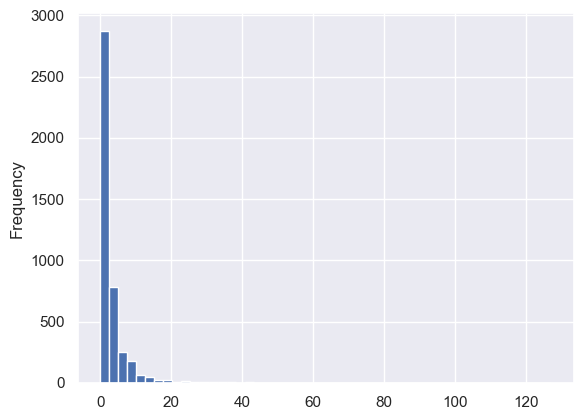

In [38]:
# Create a distribution of frequency to understand the customer frequence level
summary['frequency'].plot(kind='hist', bins=50)
print(summary['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(summary['frequency'] == 0)/float(len(summary))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [39]:
# Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 4312 subjects, a: 0.27, alpha: 71.47, b: 193.27, r: 0.87>

In [40]:
# Model summary
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.874613,0.028450,0.818850,0.930376
alpha,71.468893,2.694513,66.187647,76.750139
a,0.266954,1.303753,-2.288402,2.822310
b,193.273522,1007.282801,-1781.000769,2167.547813


In [41]:
# Compute the customer alive probability
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head(10)

,Customer ID,frequency,recency,T,monetary_value,probability_alive
0,12346.0,6.0,196.0,360.0,47.143333,0.965207
1,12347.0,1.0,37.0,39.0,711.790000,0.998573
2,12348.0,0.0,0.0,73.0,0.000000,1.000000
3,12349.0,2.0,182.0,224.0,801.310000,0.997869
4,12351.0,0.0,0.0,10.0,0.000000,1.000000
5,12352.0,1.0,17.0,27.0,200.050000,0.998315
6,12353.0,0.0,0.0,43.0,0.000000,1.000000
7,12355.0,0.0,0.0,202.0,0.000000,1.000000
8,12356.0,2.0,44.0,59.0,1325.905000,0.998052
9,12357.0,0.0,0.0,23.0,0.000000,1.000000


<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

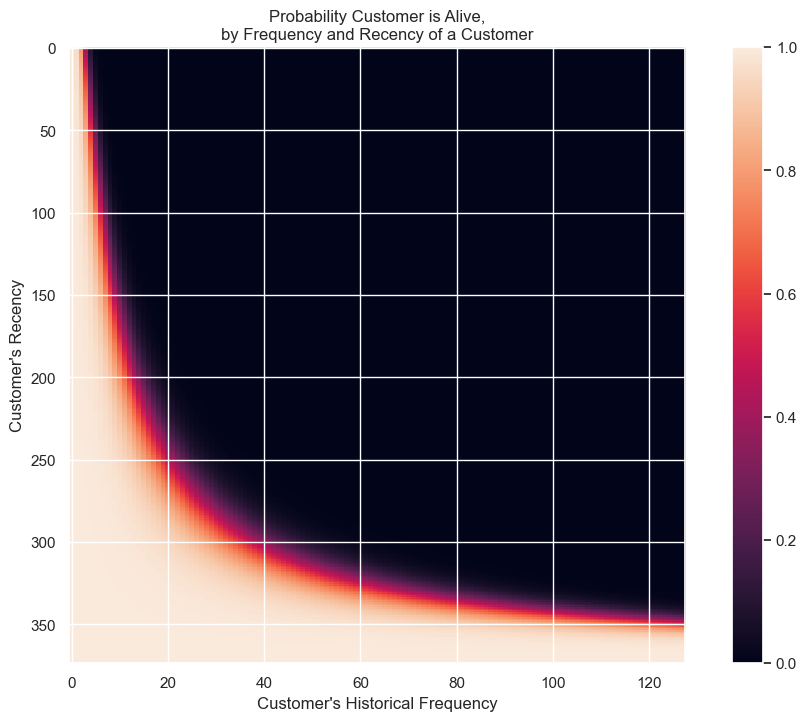

In [42]:
# Visual representation of relationship between recency and frequency
from lifetimes.plotting import plot_probability_alive_matrix

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [43]:
#Predict future transaction for the next 30 days based on historical dataa
t = 30
summary['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']),2)
summary.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,index,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,1840,14911.0,127.0,373.0,373.0,1192.235748,0.999165,8.59
1,2133,15311.0,109.0,373.0,373.0,506.240734,0.999115,7.39
2,251,12748.0,95.0,370.0,370.0,238.513263,0.999072,6.49
3,1606,14606.0,94.0,370.0,371.0,196.695851,0.998846,6.41
4,3989,17841.0,84.0,372.0,372.0,349.544524,0.999035,5.72
5,1269,14156.0,78.0,367.0,373.0,2506.409487,0.997123,5.29
6,1545,14527.0,68.0,372.0,372.0,269.995441,0.998975,4.64
7,506,13089.0,67.0,369.0,372.0,858.864627,0.998370,4.57
8,3651,17377.0,50.0,372.0,372.0,263.329000,0.998899,3.43
9,4075,17961.0,49.0,366.0,373.0,34.632653,0.997564,3.35


In [44]:
# Checking the relationship between frequency and monetary_value
return_customers_summary = summary[summary['frequency']>0]
print(return_customers_summary.shape)
return_customers_summary.head()

(2818, 7)


,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,12346.0,6.0,196.0,360.0,47.143333,0.965207,0.46
1,12347.0,1.0,37.0,39.0,711.790000,0.998573,0.51
3,12349.0,2.0,182.0,224.0,801.310000,0.997869,0.29
5,12352.0,1.0,17.0,27.0,200.050000,0.998315,0.57
8,12356.0,2.0,44.0,59.0,1325.905000,0.998052,0.66


In [45]:
# Checking the relationship between frequency and monetary_value
return_customers_summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.186686
monetary_value,0.186686,1.000000


In [46]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'],
       return_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2818 subjects, p: 11.55, q: 0.85, v: 11.52>

In [47]:
# Summary of the fitted parameters
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.551835,0.272951,11.016850,12.086820
q,0.851104,0.019881,0.812136,0.890071
v,11.520319,0.280408,10.970719,12.069919


In [48]:
# Calculating the conditional expected average profit for each customer per transaction
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_sales'] = ggf.conditional_expected_average_profit(summary['frequency'],
                                       summary['monetary_value'])
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales
0,12346.0,6.0,196.0,360.0,47.143333,0.965207,0.46,49.169013
1,12347.0,1.0,37.0,39.0,711.790000,0.998573,0.51,732.755086
3,12349.0,2.0,182.0,224.0,801.310000,0.997869,0.29,812.305220
5,12352.0,1.0,17.0,27.0,200.050000,0.998315,0.57,214.332940
8,12356.0,2.0,44.0,59.0,1325.905000,0.998052,0.66,1340.303005


In [49]:
# Checking the expected average value and the actual average value in the data to make sure the values are good
print(f"Expected Average Sales: {summary['exp_avg_sales'].mean()}")
print(f"Actual Average Sales: {summary['monetary_value'].mean()}")

Expected Average Sales: 423.63705662667843
Actual Average Sales: 415.41009128406586


In [50]:
# Predicting Customer Lifetime Value for the next 30 days
summary['predicted_clv'] =      ggf.customer_lifetime_value(bgf,
                                                               summary['frequency'],
                                                               summary['recency'],
                                                               summary['T'],
                                                               summary['monetary_value'],
                                                               time=1,     # lifetime in months
                                                               freq='D',   # frequency in which the data is present(T)      
                                                               discount_rate=0.01) # discount rate
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv
0,12346.0,6.0,196.0,360.0,47.143333,0.965207,0.46,49.169013,22.451839
1,12347.0,1.0,37.0,39.0,711.790000,0.998573,0.51,732.755086,368.619171
3,12349.0,2.0,182.0,224.0,801.310000,0.997869,0.29,812.305220,234.176842
5,12352.0,1.0,17.0,27.0,200.050000,0.998315,0.57,214.332940,120.922866
8,12356.0,2.0,44.0,59.0,1325.905000,0.998052,0.66,1340.303005,874.912841


In [51]:
summary['manual_predicted_clv'] = summary['pred_num_txn'] * summary['exp_avg_sales']
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv
0,12346.0,6.0,196.0,360.0,47.143333,0.965207,0.46,49.169013,22.451839,22.617746
1,12347.0,1.0,37.0,39.0,711.790000,0.998573,0.51,732.755086,368.619171,373.705094
3,12349.0,2.0,182.0,224.0,801.310000,0.997869,0.29,812.305220,234.176842,235.568514
5,12352.0,1.0,17.0,27.0,200.050000,0.998315,0.57,214.332940,120.922866,122.169776
8,12356.0,2.0,44.0,59.0,1325.905000,0.998052,0.66,1340.303005,874.912841,884.599983


In [52]:
# CLV in terms of profit (profit margin is 5%)
profit_margin = 0.05
summary['CLV'] = summary['predicted_clv'] * profit_margin
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,CLV
0,12346.0,6.0,196.0,360.0,47.143333,0.965207,0.46,49.169013,22.451839,22.617746,1.122592
1,12347.0,1.0,37.0,39.0,711.790000,0.998573,0.51,732.755086,368.619171,373.705094,18.430959
3,12349.0,2.0,182.0,224.0,801.310000,0.997869,0.29,812.305220,234.176842,235.568514,11.708842
5,12352.0,1.0,17.0,27.0,200.050000,0.998315,0.57,214.332940,120.922866,122.169776,6.046143
8,12356.0,2.0,44.0,59.0,1325.905000,0.998052,0.66,1340.303005,874.912841,884.599983,43.745642


In [53]:
# Distribution of CLV for the business in the next 30 days
summary['CLV'].describe()

count    2818.000000
mean       11.539216
std        36.910512
min         0.123542
25%         3.081078
50%         5.824504
75%        10.866741
max      1180.277015
Name: CLV, dtype: float64

In [54]:
#creating the summary data using summary_data_from_transaction_data function
#for dataset-2
summary = lifetimes.utils.summary_data_from_transaction_data(df1_clv, 'Customer ID','InvoiceDate','TotalSales')
summary = summary.reset_index()
summary.head()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12347.0,6.0,365.0,367.0,599.701667
2,12348.0,3.0,283.0,358.0,301.480000
3,12349.0,0.0,0.0,18.0,0.000000
4,12350.0,0.0,0.0,310.0,0.000000


count    4338.000000
mean        2.864223
std         5.949000
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 35.68 %


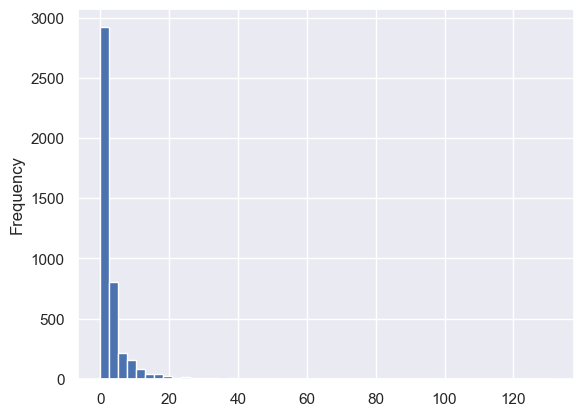

In [55]:
# Create a distribution of frequency to understand the customer frequence level
summary['frequency'].plot(kind='hist', bins=50)
print(summary['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(summary['frequency'] == 0)/float(len(summary))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [56]:
# Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 4338 subjects, a: 0.00, alpha: 68.91, b: 6.75, r: 0.83>

In [57]:
# Model summary
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826542,0.026785,0.774044,0.879040
alpha,68.905121,2.611786,63.786020,74.024221
a,0.003437,0.010339,-0.016828,0.023702
b,6.745116,22.414725,-37.187745,50.677978


In [58]:
# Compute the customer alive probability
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head(10)

,Customer ID,frequency,recency,T,monetary_value,probability_alive
0,12346.0,0.0,0.0,325.0,0.000000,1.000000
1,12347.0,6.0,365.0,367.0,599.701667,0.999698
2,12348.0,3.0,283.0,358.0,301.480000,0.999177
3,12349.0,0.0,0.0,18.0,0.000000,1.000000
4,12350.0,0.0,0.0,310.0,0.000000,1.000000
5,12352.0,6.0,260.0,296.0,368.256667,0.999406
6,12353.0,0.0,0.0,204.0,0.000000,1.000000
7,12354.0,0.0,0.0,232.0,0.000000,1.000000
8,12355.0,0.0,0.0,214.0,0.000000,1.000000
9,12356.0,2.0,303.0,325.0,269.905000,0.999478


<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

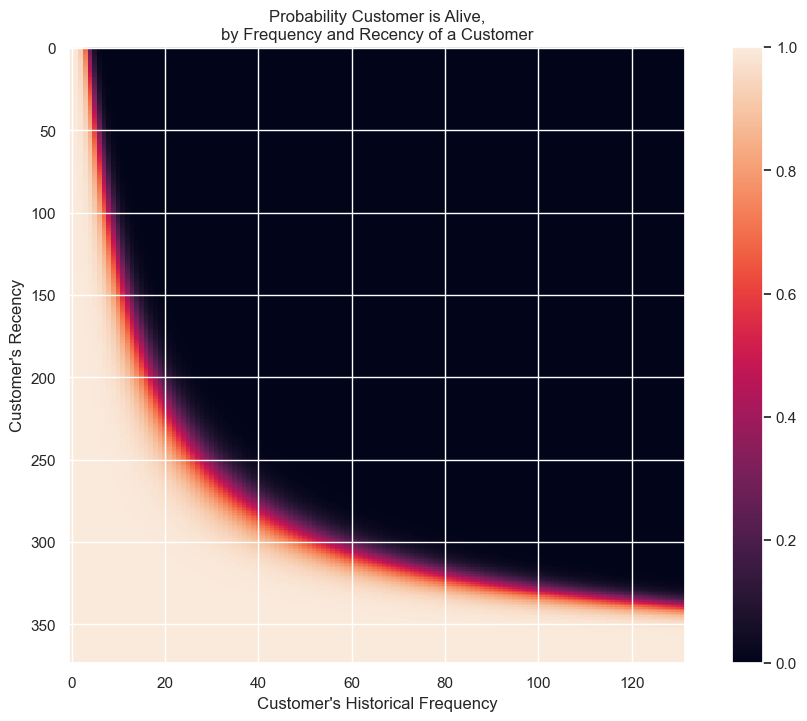

In [59]:
# Visual representation of relationship between recency and frequency
from lifetimes.plotting import plot_probability_alive_matrix

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [60]:
#Predict future transaction for the next 30 days based on historical dataa
t = 30
summary['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']),2)
summary.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,index,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,1879,14911.0,131.0,372.0,373.0,1093.661679,0.999966,8.95
1,326,12748.0,112.0,373.0,373.0,301.024821,0.999971,7.66
2,4010,17841.0,111.0,372.0,373.0,364.452162,0.999962,7.59
3,2176,15311.0,89.0,373.0,373.0,677.729438,0.999964,6.10
4,1661,14606.0,88.0,372.0,373.0,135.890114,0.999955,6.03
5,481,12971.0,70.0,369.0,372.0,159.211286,0.999926,4.82
6,562,13089.0,65.0,367.0,369.0,893.714308,0.999934,4.51
7,1602,14527.0,53.0,367.0,369.0,155.016415,0.999925,3.69
8,1069,13798.0,52.0,371.0,372.0,706.650962,0.999933,3.59
9,2990,16422.0,47.0,352.0,369.0,702.472340,0.999567,3.27


In [61]:
# Checking the relationship between frequency and monetary_value
return_customers_summary = summary[summary['frequency']>0]
print(return_customers_summary.shape)
return_customers_summary.head()

(2790, 7)


,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
1,12347.0,6.0,365.0,367.0,599.701667,0.999698,0.47
2,12348.0,3.0,283.0,358.0,301.480000,0.999177,0.27
5,12352.0,6.0,260.0,296.0,368.256667,0.999406,0.56
9,12356.0,2.0,303.0,325.0,269.905000,0.999478,0.22
11,12358.0,1.0,149.0,150.0,683.200000,0.999486,0.25


In [62]:
# Checking the relationship between frequency and monetary_value
return_customers_summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.015905
monetary_value,0.015905,1.000000


In [63]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'],
       return_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 11.13, q: 0.84, v: 11.29>

In [64]:
# Summary of the fitted parameters
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.125602,0.269274,10.597825,11.653379
q,0.838780,0.019731,0.800107,0.877452
v,11.293018,0.281539,10.741201,11.844836


In [65]:
# Calculating the conditional expected average profit for each customer per transaction
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_sales'] = ggf.conditional_expected_average_profit(summary['frequency'],
                                       summary['monetary_value'])
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales
1,12347.0,6.0,365.0,367.0,599.701667,0.999698,0.47,603.040271
2,12348.0,3.0,283.0,358.0,301.480000,0.999177,0.27,306.725919
5,12352.0,6.0,260.0,296.0,368.256667,0.999406,0.56,371.034942
9,12356.0,2.0,303.0,325.0,269.905000,0.999478,0.22,277.562577
11,12358.0,1.0,149.0,150.0,683.200000,0.999486,0.25,704.704836


In [66]:
# Checking the expected average value and the actual average value in the data to make sure the values are good
print(f"Expected Average Sales: {summary['exp_avg_sales'].mean()}")
print(f"Actual Average Sales: {summary['monetary_value'].mean()}")

Expected Average Sales: 486.91124692733956
Actual Average Sales: 477.3824890515858


In [67]:
# Predicting Customer Lifetime Value for the next 30 days
summary['predicted_clv'] =      ggf.customer_lifetime_value(bgf,
                                                               summary['frequency'],
                                                               summary['recency'],
                                                               summary['T'],
                                                               summary['monetary_value'],
                                                               time=1,     # lifetime in months
                                                               freq='D',   # frequency in which the data is present(T)      
                                                               discount_rate=0.01) # discount rate
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv
1,12347.0,6.0,365.0,367.0,599.701667,0.999698,0.47,603.040271,280.409529
2,12348.0,3.0,283.0,358.0,301.480000,0.999177,0.27,306.725919,81.591034
5,12352.0,6.0,260.0,296.0,368.256667,0.999406,0.56,371.034942,206.034649
9,12356.0,2.0,303.0,325.0,269.905000,0.999478,0.22,277.562577,59.125300
11,12358.0,1.0,149.0,150.0,683.200000,0.999486,0.25,704.704836,174.550517


In [68]:
summary['manual_predicted_clv'] = summary['pred_num_txn'] * summary['exp_avg_sales']
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv
1,12347.0,6.0,365.0,367.0,599.701667,0.999698,0.47,603.040271,280.409529,283.428927
2,12348.0,3.0,283.0,358.0,301.480000,0.999177,0.27,306.725919,81.591034,82.815998
5,12352.0,6.0,260.0,296.0,368.256667,0.999406,0.56,371.034942,206.034649,207.779568
9,12356.0,2.0,303.0,325.0,269.905000,0.999478,0.22,277.562577,59.125300,61.063767
11,12358.0,1.0,149.0,150.0,683.200000,0.999486,0.25,704.704836,174.550517,176.176209


In [69]:
# CLV in terms of profit (profit margin is 5%)
profit_margin = 0.05
summary['CLV'] = summary['predicted_clv'] * profit_margin
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,CLV
1,12347.0,6.0,365.0,367.0,599.701667,0.999698,0.47,603.040271,280.409529,283.428927,14.020476
2,12348.0,3.0,283.0,358.0,301.480000,0.999177,0.27,306.725919,81.591034,82.815998,4.079552
5,12352.0,6.0,260.0,296.0,368.256667,0.999406,0.56,371.034942,206.034649,207.779568,10.301732
9,12356.0,2.0,303.0,325.0,269.905000,0.999478,0.22,277.562577,59.125300,61.063767,2.956265
11,12358.0,1.0,149.0,150.0,683.200000,0.999486,0.25,704.704836,174.550517,176.176209,8.727526


In [70]:
# Distribution of CLV for the business in the next 30 days
summary['CLV'].describe()

count    2790.000000
mean       12.312109
std        49.327355
min         0.136205
25%         2.826066
50%         5.668582
75%        10.967735
max      1692.149684
Name: CLV, dtype: float64